In [23]:
import pandas as pd
import numpy as np
from pycaret.regression import *
from pycaret.regression import RegressionExperiment


In [63]:
data = pd.read_csv('Data/rent_offers_clean.csv')

In [65]:
data.isna().sum()/len(data)*100

id                         0.000000
url                        0.000000
price                      0.000000
negotiable                 0.000000
description                0.000000
city                       0.000000
date                       0.000000
details                    0.000000
district                   0.000000
posted_by                  0.000000
building_type             44.766036
floor                      0.000000
building_height_floors     0.007111
apt_area_sqm               0.000000
kitchen_area_sqm           0.007111
building_material         45.477173
pets                      64.066278
rooms                      0.000000
layout                    35.130138
bathroom                  28.765467
heating                   29.163704
renovation                25.238231
furnishing                18.027308
lux                        0.000000
district_city              0.000000
dtype: float64

In [67]:
data_sel = data.loc[(data_sel.rooms == 2) & (data.city == 'Kiev')]
data_sel.drop(['id', 'url', 'description', 'date', 'details', 'pets', 'city', 'district_city'], axis=1, inplace=True)

In [68]:
data_sel['first_floor']=data_sel['floor'].apply(lambda x: 1 if  int(x) == 1 else 0)
data_sel['last_floor'] = np.where(data_sel['floor'] == data_sel['building_height_floors'], 1, 0)
#data_sel.drop_duplicates(inplace=True, ignore_index = True)
data_sel.drop('building_height_floors', axis=1, inplace=True)

In [69]:

s = setup(data = data_sel, target = 'price', normalize = True, transform_target = True,train_size = 0.8, session_id=42)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(1367, 18)"
4,Transformed data shape,"(1367, 60)"
5,Transformed train set shape,"(1093, 60)"
6,Transformed test set shape,"(274, 60)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,9


In [70]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,7676.1941,195060384.7200,13624.6483,0.5559,0.3502,0.2714,0.8090
gbr,Gradient Boosting Regressor,7835.9002,205166297.3747,13920.6262,0.5550,0.3434,0.2700,0.7590
et,Extra Trees Regressor,7720.5514,193109793.5324,13586.6955,0.5530,0.3592,0.2755,0.8010
knn,K Neighbors Regressor,8754.1171,234264385.4473,14947.9694,0.4839,0.3978,0.3258,0.7170
huber,Huber Regressor,8408.1109,236978616.7053,14996.4918,0.4813,0.3708,0.2880,0.6980
br,Bayesian Ridge,8438.6451,236962210.8766,15009.3477,0.4795,0.3683,0.2915,0.6970
ridge,Ridge Regression,8481.4199,236409325.3957,15018.7534,0.4769,0.3690,0.2932,0.6820
lar,Least Angle Regression,8482.6016,236524686.7643,15021.9896,0.4766,0.3692,0.2933,0.6910
ada,AdaBoost Regressor,9699.2869,252611510.9780,15565.6708,0.4401,0.4153,0.3517,0.7520
par,Passive Aggressive Regressor,9968.0231,298253798.8710,16816.3651,0.3387,0.4347,0.3499,0.6950


In [71]:
results = pull()

In [72]:
print(results)


                              Model         MAE           MSE        RMSE  \
rf          Random Forest Regressor   7676.1941  1.950604e+08  13624.6483   
gbr     Gradient Boosting Regressor   7835.9002  2.051663e+08  13920.6262   
et            Extra Trees Regressor   7720.5514  1.931098e+08  13586.6955   
knn           K Neighbors Regressor   8754.1171  2.342644e+08  14947.9694   
huber               Huber Regressor   8408.1109  2.369786e+08  14996.4918   
br                   Bayesian Ridge   8438.6451  2.369622e+08  15009.3477   
ridge              Ridge Regression   8481.4199  2.364093e+08  15018.7534   
lar          Least Angle Regression   8482.6016  2.365247e+08  15021.9896   
ada              AdaBoost Regressor   9699.2869  2.526115e+08  15565.6708   
par    Passive Aggressive Regressor   9968.0231  2.982538e+08  16816.3651   
omp     Orthogonal Matching Pursuit   9756.9737  2.918858e+08  16942.7504   
dt          Decision Tree Regressor  10259.9179  3.957312e+08  19623.8421   

In [73]:
lightgbm = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7758.6063,288750512.6824,16992.6606,0.4617,0.3397,0.2547
1,6898.4036,99189797.7936,9959.4075,0.7011,0.3281,0.2721
2,7197.8354,111363248.9989,10552.8787,0.6713,0.3053,0.2515
3,7935.8652,245185757.0856,15658.4085,0.5100,0.3594,0.2984
4,8675.6913,263334522.9273,16227.5852,0.4863,0.3509,0.2794
5,7430.2282,119640401.6156,10938.0255,0.5520,0.3547,0.2872
6,8583.1623,312747709.1319,17684.6744,0.4748,0.3894,0.2572
7,8445.5527,252306979.5584,15884.1739,0.5272,0.3496,0.2778
8,5796.4301,67977429.3736,8244.8426,0.6158,0.2827,0.2313


In [74]:
tuned_lgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7891.3559,279436100.5430,16716.3423,0.4790,0.3288,0.2458
1,6649.5504,93803599.1422,9685.2258,0.7173,0.3091,0.2521
2,7280.0305,122271763.6425,11057.6563,0.6391,0.3103,0.2448
3,7755.3724,233786808.4725,15290.0886,0.5328,0.3555,0.2967
4,8961.6073,275776537.2649,16606.5209,0.4620,0.3538,0.2836
5,6916.5228,105109835.2765,10252.3088,0.6064,0.3317,0.2684
6,8546.8589,336932829.0855,18355.7301,0.4342,0.3972,0.2496
7,8245.3373,249629909.7491,15799.6807,0.5322,0.3317,0.2699
8,5652.5502,63556583.3923,7972.2383,0.6408,0.2716,0.2243


Fitting 10 folds for each of 10 candidates, totalling 100 fits


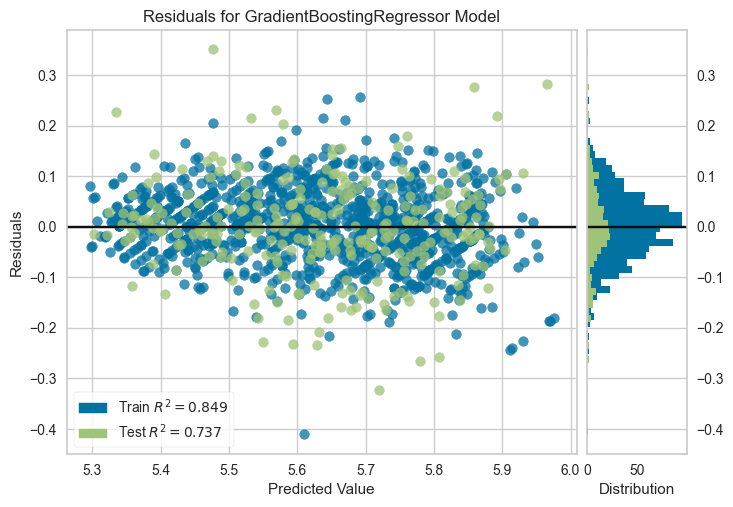

In [75]:
plot_model(tuned_lgbm)

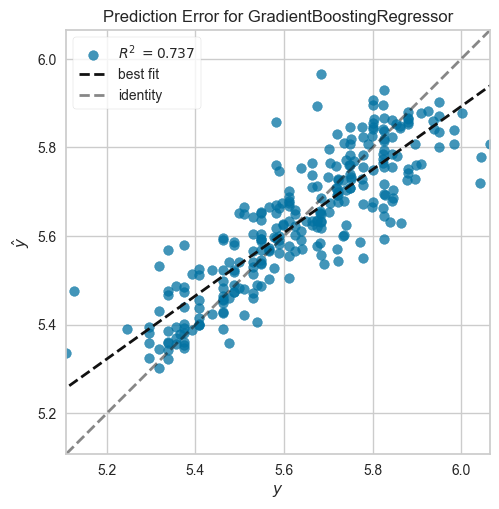

In [76]:
plot_model(tuned_lgbm, plot = 'error')

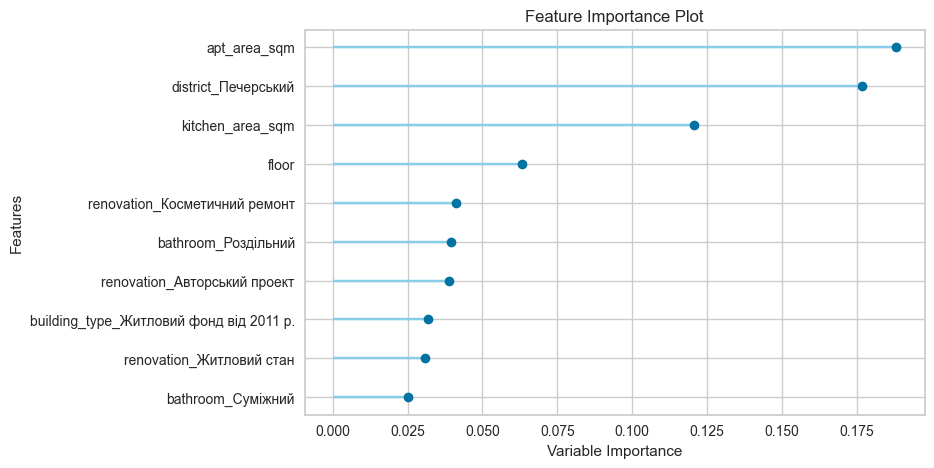

In [77]:
plot_model(tuned_lgbm, plot='feature')
